<a href="https://colab.research.google.com/github/congltk1234/Fashion_Items_Classification/blob/main/FashionMNIST/LeNet_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U tensorflow_datasets

import tensorflow as tf
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [59]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [60]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()

train_size = int(0.8 * num_train_examples)
val_size = int(0.2 * num_train_examples)

val_dataset = train_dataset.skip(train_size)
val_dataset = val_dataset.cache()
train_dataset = train_dataset.take(train_size)

test_dataset  =  test_dataset.cache()

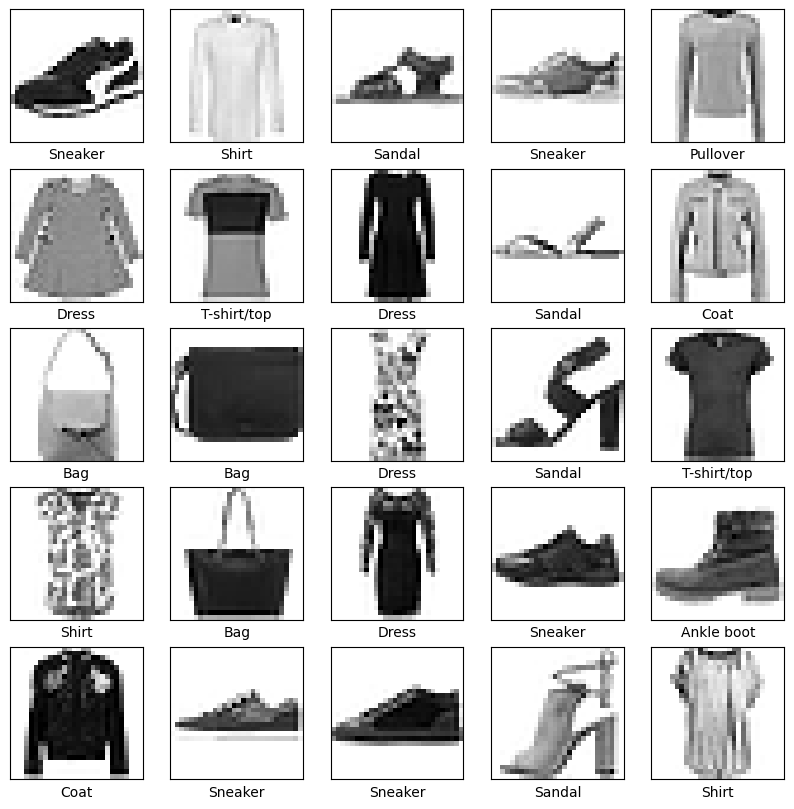

In [ ]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in val_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [ ]:
# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing

def build_LeNet5(input_shape=(28,28,1)):
    # Sequential model
    model = keras.Sequential([

    # Input shape
    keras.Input(shape=input_shape),    # shape=(28,28,1)

    # Layer 1
    layers.Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='sigmoid'),          # shape=(28,28,6)
    layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),                   # shape=(14,14,6)

    # Layer 2
    layers.Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='sigmoid'),        # shape=(10,10,16)
    layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding="valid"),                   # shape=(5,5,16)

    # Layer 3
    layers.Flatten(),                                    # shape=(400,1)
    layers.Dense(units=120, activation='sigmoid'),       # shape=(120,1)

    # Layer 4
    layers.Dense(units=84, activation='sigmoid'),        # shape=(84,1)

    # Layer 5
    layers.Dense(units=10, activation='softmax')         # shape=(10,1)
    ])

    # Compile model (SGD = stochastic gradient descent)
    model.compile(optimizer='SGD',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

    return model

In [ ]:
# Model summary
model=build_LeNet5()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

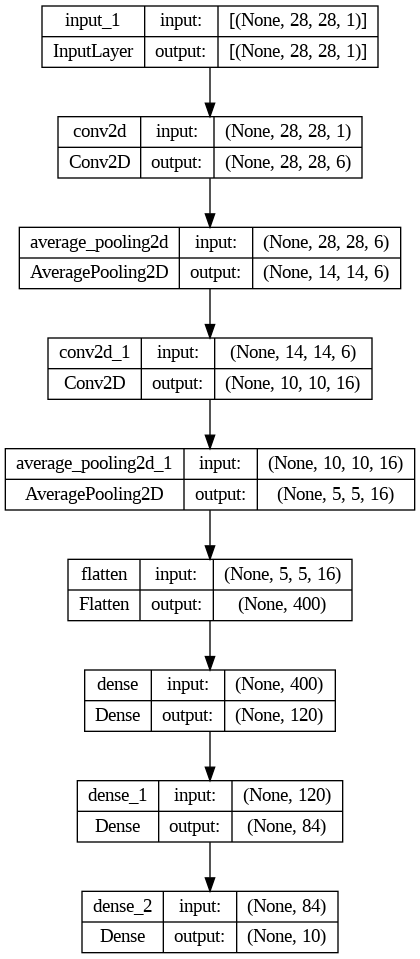

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='LeNet5.png', show_shapes=True, show_layer_names=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 11.7 MB/s eta 0:00:00


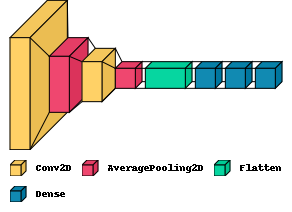

In [ ]:
!pip install visualkeras

import visualkeras
visualkeras.layered_view(model, legend=True)

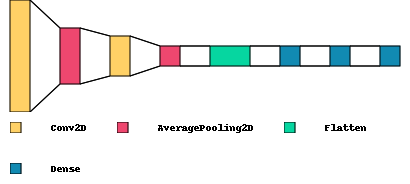

In [ ]:
visualkeras.layered_view(model, legend=True, draw_volume=False,spacing=30)

In [ ]:
BATCH_SIZE = 32

train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
val_dataset = val_dataset.cache().batch(BATCH_SIZE)

In [ ]:
epoch = 200

# Build model
model = build_LeNet5()

from keras.callbacks import ModelCheckpoint
checkpoint_filepath = 'lenet5_epoch_{epoch:02d}.h5'
model_checkpoint = ModelCheckpoint(checkpoint_filepath,
                                   save_weights_only=True,
                                   period=50,  # Save weights every 50 epochs
                                   verbose=1)
import time
# get the start time
st = time.time()
history = model.fit(train_dataset, epochs=epoch,
                    steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE),
                    validation_data=val_dataset,
                    validation_steps=len(val_dataset) // BATCH_SIZE,
                    callbacks=[model_checkpoint],
                    verbose=True)

print('Execution time:', time.time() - st, 'seconds')

Epoch 1/200
1875/1875 [==============================] - 20s 7ms/step - loss: 2.3065 - accuracy: 0.1013 - val_loss: 2.3069 - val_accuracy: 0.0909
Epoch 2/200
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3037 - accuracy: 0.1027 - val_loss: 2.3009 - val_accuracy: 0.1051
Epoch 3/200
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3031 - accuracy: 0.1044 - val_loss: 2.3024 - val_accuracy: 0.1051
Epoch 4/200
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3021 - accuracy: 0.1062 - val_loss: 2.3037 - val_accuracy: 0.1051
Epoch 5/200
1875/1875 [==============================] - 18s 9ms/step - loss: 2.3004 - accuracy: 0.1103 - val_loss: 2.2967 - val_accuracy: 0.1222
Epoch 6/200
1875/1875 [==============================] - 11s 6ms/step - loss: 2.2971 - accuracy: 0.1217 - val_loss: 2.2956 - val_accuracy: 0.1108
Epoch 7/200
1875/1875 [==============================] - 15s 8ms/step - loss: 2.2873 - accuracy: 0.1552 - val_loss: 2.2762 -

# Epoch 200

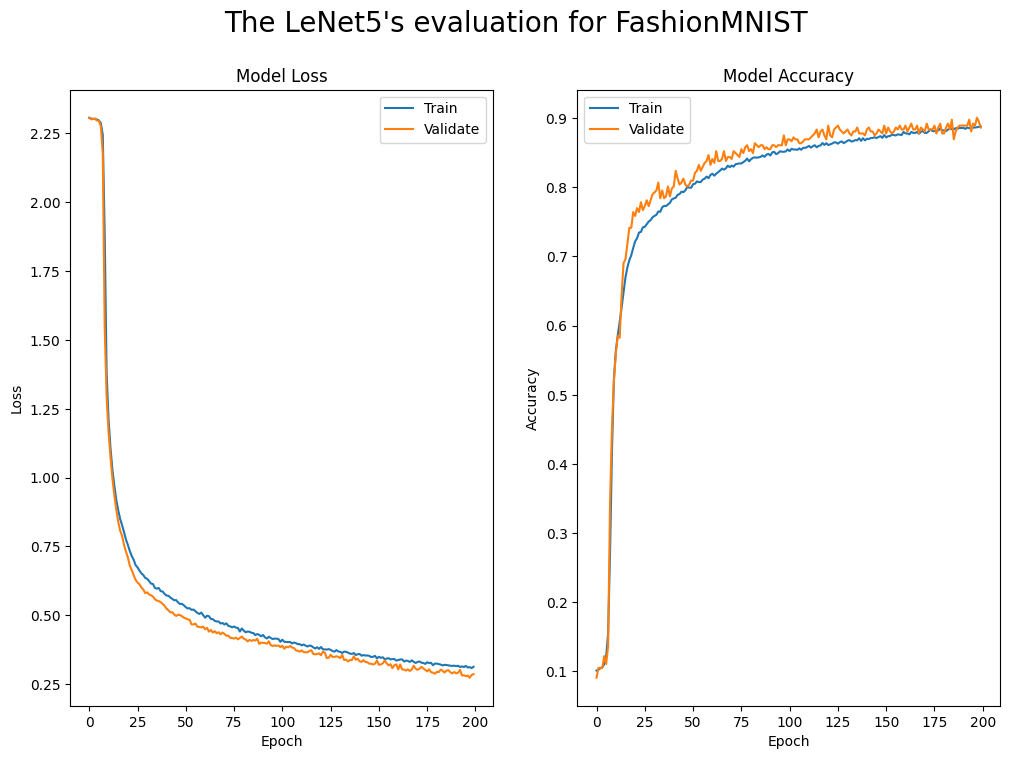

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2, figsize=(12,8))
fig.suptitle("The LeNet5's evaluation for FashionMNIST ",fontsize=20)
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train','Validate'])


axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train','Validate'])
plt.show()

In [ ]:
print(history.history)

{'loss': [2.306452751159668, 2.303659439086914, 2.3030834197998047, 2.30214524269104, 2.3004024028778076, 2.297100782394409, 2.287273406982422, 2.2444591522216797, 1.8878798484802246, 1.380250096321106, 1.210507869720459, 1.1080961227416992, 1.02855384349823, 0.9710042476654053, 0.9197151064872742, 0.8817102313041687, 0.8496429920196533, 0.8273038268089294, 0.8021417856216431, 0.7754707932472229, 0.7553274631500244, 0.7333307862281799, 0.7151230573654175, 0.7016245722770691, 0.6821123957633972, 0.6738686561584473, 0.6620551943778992, 0.6522842049598694, 0.6458768248558044, 0.6353144645690918, 0.6324905157089233, 0.6240628361701965, 0.6149119138717651, 0.6134530305862427, 0.598976194858551, 0.5967181921005249, 0.5987704992294312, 0.5873895287513733, 0.5863288044929504, 0.5774744153022766, 0.5716129541397095, 0.5707722902297974, 0.5642684102058411, 0.5594615340232849, 0.5544454455375671, 0.5549605488777161, 0.5466591715812683, 0.5407021045684814, 0.5415047407150269, 0.5357875823974609, 0

In [ ]:
import tqdm
testX = []
testY = []
for (image, label) in tqdm.tqdm(test_dataset.take(10000)):
    image = tf.convert_to_tensor(image)
    testX.append(image)
    testY.append(label)

testX = np.array(testX)
testY = np.array(testY)

testX.shape, testY.shape

100%|██████████| 10000/10000 [00:04<00:00, 2363.47it/s]


((10000, 28, 28, 1), (10000,))

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model.predict_generator(testX, num_test_examples // BATCH_SIZE)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(testY, y_pred, target_names=class_names))

<ipython-input-19-e4cbea3b5a43>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(testX, num_test_examples // BATCH_SIZE)


              precision    recall  f1-score   support

 T-shirt/top       0.83      0.81      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.85      0.74      0.79      1000
       Dress       0.85      0.91      0.88      1000
        Coat       0.79      0.80      0.80      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.66      0.69      0.67      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.94      0.98      0.96      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



<Figure size 1000x300 with 0 Axes>

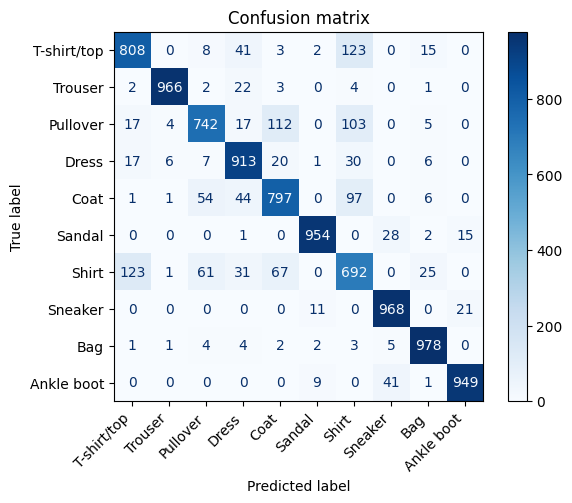

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.81      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.85      0.74      0.79      1000
       Dress       0.85      0.91      0.88      1000
        Coat       0.79      0.80      0.80      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.66      0.69      0.67      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.94      0.98      0.96      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

0.8767
0.87655747415889


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,3))

disp = ConfusionMatrixDisplay.from_predictions(
    testY, y_pred,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

# print(disp.confusion_matrix)
# Rotate x-axis labels
disp.ax_.set_xticklabels(disp.ax_.get_xticklabels(), rotation=45, ha='right')

plt.show()


from sklearn.metrics import classification_report
print(classification_report(testY, y_pred, target_names=class_names))
from sklearn.metrics import accuracy_score
print(accuracy_score(testY, y_pred))
from sklearn.metrics import f1_score
print(f1_score(testY, y_pred, average='weighted'))

In [ ]:
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3480 - accuracy: 0.8767
Accuracy on test dataset: 0.8766999840736389


# Epoch 100

In [ ]:
# Build model
model = build_LeNet5()

# Load the entire model from the saved file
model.load_weights('lenet5_epoch_100.h5')

100%|██████████| 10000/10000 [00:57<00:00, 173.13it/s]


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.76      0.83      0.79      1000
     Trouser       0.97      0.95      0.96      1000
    Pullover       0.75      0.72      0.73      1000
       Dress       0.83      0.86      0.84      1000
        Coat       0.73      0.75      0.74      1000
      Sandal       0.96      0.95      0.95      1000
       Shirt       0.57      0.50      0.53      1000
     Sneaker       0.93      0.94      0.93      1000
         Bag       0.94      0.95      0.95      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



<Figure size 1000x300 with 0 Axes>

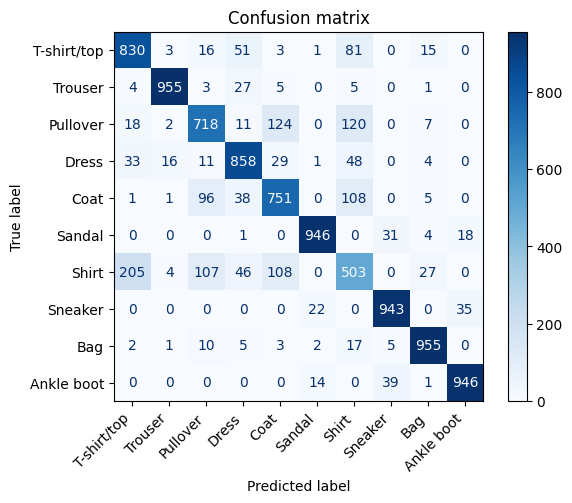

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.83      0.79      1000
     Trouser       0.97      0.95      0.96      1000
    Pullover       0.75      0.72      0.73      1000
       Dress       0.83      0.86      0.84      1000
        Coat       0.73      0.75      0.74      1000
      Sandal       0.96      0.95      0.95      1000
       Shirt       0.57      0.50      0.53      1000
     Sneaker       0.93      0.94      0.93      1000
         Bag       0.94      0.95      0.95      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

0.8405
0.8388230660087947


In [61]:
import tqdm
testX = []
testY = []

for (image, label) in tqdm.tqdm(test_dataset.take(10000)):
    image = tf.convert_to_tensor(image)
    testX.append(image)
    testY.append(label)

testX = np.array(testX)
testY = np.array(testY)

from sklearn.metrics import classification_report

Y_pred = model.predict(testX)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(testY, y_pred, target_names=class_names))

from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,3))

disp = ConfusionMatrixDisplay.from_predictions(
    testY, y_pred,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

# print(disp.confusion_matrix)
# Rotate x-axis labels
disp.ax_.set_xticklabels(disp.ax_.get_xticklabels(), rotation=45, ha='right')

plt.show()


from sklearn.metrics import classification_report
print(classification_report(testY, y_pred, target_names=class_names))
from sklearn.metrics import accuracy_score
print(accuracy_score(testY, y_pred))
from sklearn.metrics import f1_score
print(f1_score(testY, y_pred, average='weighted'))